# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [126]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(
        np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y)))
    )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [127]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [128]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207103e-08


In [129]:
y


array([0, 1, 2, 2, 1])

In [130]:
print('done')

done


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [131]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79412040779e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [132]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865060e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Inspect the raw gradient 
Karpathy recommends taking a look a the raw gradient as well, to make sure it's not so small that it's entering numerically unstable terriority for floats

In [138]:
print(grads['W1'])
print('--')
print(grads['W2'])
print('--')
print(grads['b1'])
print('--')
print(grads['b2'])

[[ -9.68499043e-02   4.00157208e-03  -2.05517828e-01   1.87986352e-01
    1.60531645e-01  -9.77277880e-03   9.50088418e-03   2.68884345e-03
   -3.01022811e-02  -5.67802801e-03]
 [  4.45595008e-02   1.45427351e-02   6.95515502e-01  -2.88616327e-01
   -2.66986989e-01   3.33674327e-03   1.49407907e-02   1.93435586e-02
   -6.54700997e-02  -5.32928651e-01]
 [  1.16977821e-02   6.53618595e-03  -2.31623550e-01  -6.26390355e-02
   -1.41638971e-03  -1.45436567e-02   4.57585173e-04  -2.90067077e-03
    5.35668029e-01   3.69731998e-01]
 [  7.71766403e-02   3.78162520e-03  -3.13778323e-01   2.26868568e-01
    2.06678709e-01   1.56348969e-03   1.23029068e-02  -2.18055786e-03
   -6.78943040e-01   9.85573015e-02]]
--
[[ -5.13764691e-01   1.67232930e-01   3.04783350e-01]
 [  1.95077540e-02  -5.09652182e-03  -4.38074302e-03]
 [  2.92229174e-01   1.18896894e-01  -4.32018096e-01]
 [ -2.33121075e-01   1.86288200e-01   3.96198312e-02]
 [  7.78174796e-01  -3.54233027e-01  -4.41137965e-01]
 [  4.28331871e-03

In [142]:
w1 = grads['W1']
w1.

# Burn in grad check
Recheck after a short training epoch, to see if the gradient is correct in the region we care about. We turn off regularization for this check.

Final training loss:  0.0365664138069


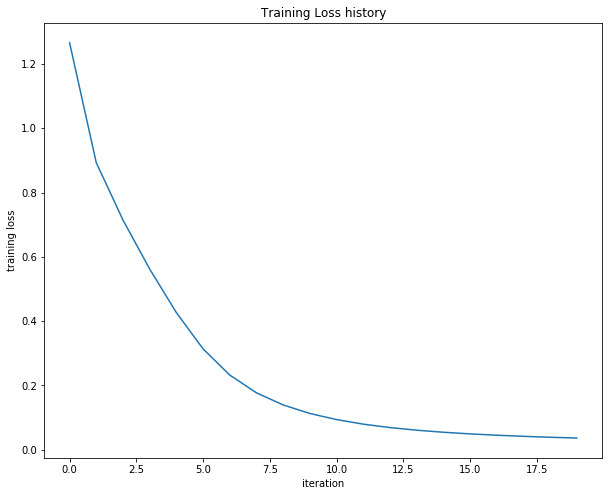

W2 max relative error: 1.164926e-09
b2 max relative error: 5.128422e-10
W1 max relative error: 6.344871e-09
b1 max relative error: 7.048072e-10


In [144]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=0,
            num_iters=20, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()
loss, grads = net.loss(X, y, reg=0)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

# Recheck with strong regularization

In [161]:
reg = 3
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=reg,
            num_iters=20, verbose=False)

loss, grads = net.loss(X, y, reg=reg)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=reg)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))


W2 max relative error: 1.403180e-05
b2 max relative error: 2.555832e-09
W1 max relative error: 7.257467e-05
b1 max relative error: 4.244324e-05


Hmm, W1 and b1 gradients are both a bit high when reg gets large, potentially something to look into?

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0156349876119


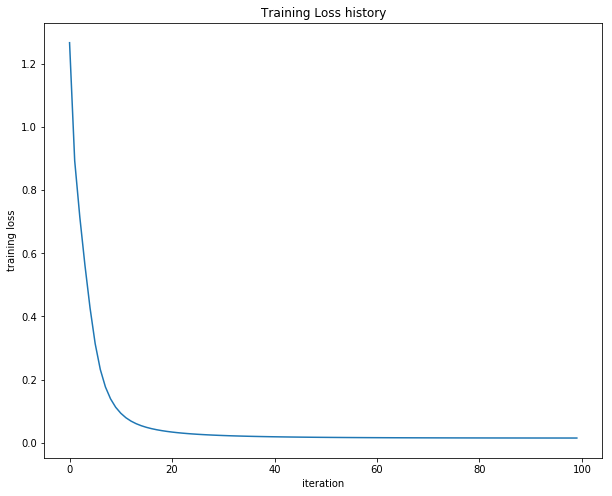

In [163]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [168]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Preflight sanity checks

In [181]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
loss, grads = net.loss(X_train, y_train, reg=0)
print(f'Initial untrained accurracy should be ~0.1: {(net.predict(X_train) == y_train).mean()}, initial loss ~2.302: {loss}')

# "As a second sanity check, increasing the regularization strength should increase the loss:" 
loss, grads = net.loss(X_train, y_train, reg=150)
print(loss)

Initial untrained accurracy should be ~0.1: 0.10318367346938775, initial loss ~2.302: 2.3025899454257166
2.53479722249


# Overfit an initial test set:

iteration 0 / 3500: loss 2.302597
iteration 100 / 3500: loss 2.302201
iteration 200 / 3500: loss 2.301059
iteration 300 / 3500: loss 2.295808
iteration 400 / 3500: loss 2.270692
iteration 500 / 3500: loss 2.180105
iteration 600 / 3500: loss 2.040727
iteration 700 / 3500: loss 1.928233
iteration 800 / 3500: loss 1.829579
iteration 900 / 3500: loss 1.730165
iteration 1000 / 3500: loss 1.619558
iteration 1100 / 3500: loss 1.493265
iteration 1200 / 3500: loss 1.352839
iteration 1300 / 3500: loss 1.204026
iteration 1400 / 3500: loss 1.055101
iteration 1500 / 3500: loss 0.913209
iteration 1600 / 3500: loss 0.781942
iteration 1700 / 3500: loss 0.663099
iteration 1800 / 3500: loss 0.557126
iteration 1900 / 3500: loss 0.466074
iteration 2000 / 3500: loss 0.389593
iteration 2100 / 3500: loss 0.326509
iteration 2200 / 3500: loss 0.274943
iteration 2300 / 3500: loss 0.232890
iteration 2400 / 3500: loss 0.198896
iteration 2500 / 3500: loss 0.171531
iteration 2600 / 3500: loss 0.149499
iteration 270

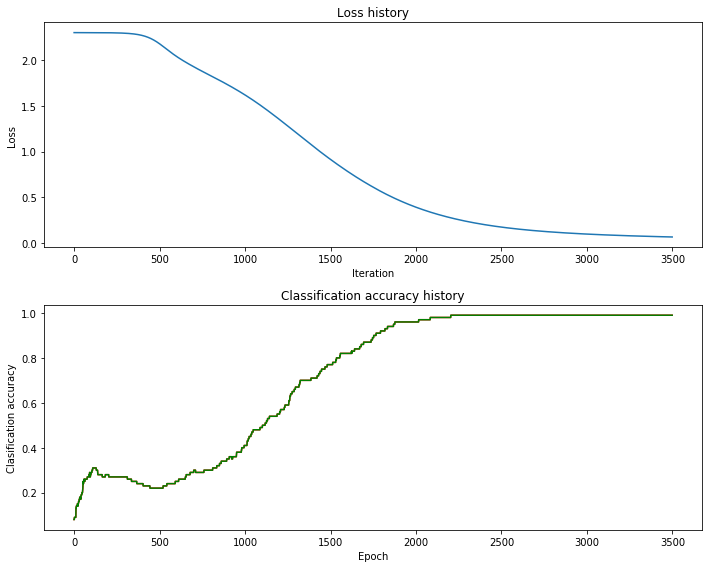

In [256]:
baby_train = np.random.choice(range(49000), 100, replace=False)
X_baby_train = X_train[baby_train, :]
y_baby_train = y_train[baby_train]

net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(X_baby_train, y_baby_train, X_baby_train, y_baby_train,
            num_iters=3500, batch_size=100,
            learning_rate=5e-5, learning_rate_decay=0.9999,
            reg=0, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])

# Predict on the validation set
val_acc = (net.predict(X_baby_train) == y_baby_train).mean()
print('Validation accuracy: ', val_acc)

plot_hist(stats)


Note the interesting interaction between learning rate and learning decay rate! 

# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [285]:
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302973
W1 update scale is: 0.0004544634306611817
b1 update scale is: 1.0000000000000002
W2 update scale is: 0.006710231604339791
b2 update scale is: 1.0
iteration 100 / 1000: loss 2.302564
W1 update scale is: 0.0006242158443799312
b1 update scale is: 0.020806371682842047
W2 update scale is: 0.009441131941340193
b2 update scale is: 0.07006759664076477
iteration 200 / 1000: loss 2.298865
W1 update scale is: 0.002004421509209562
b1 update scale is: 0.016860415486391337
W2 update scale is: 0.014223009555029639
b2 update scale is: 0.05175036735312847
iteration 300 / 1000: loss 2.267388
W1 update scale is: 0.004807935143237689
b1 update scale is: 0.010596452987844887
W2 update scale is: 0.012868853878815192
b2 update scale is: 0.03795732315211698
iteration 400 / 1000: loss 2.220077
W1 update scale is: 0.004613543158604952
b1 update scale is: 0.003552022069227739
W2 update scale is: 0.006618441090763537
b2 update scale is: 0.0219175818199359
iteration 500 / 1000: lo

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

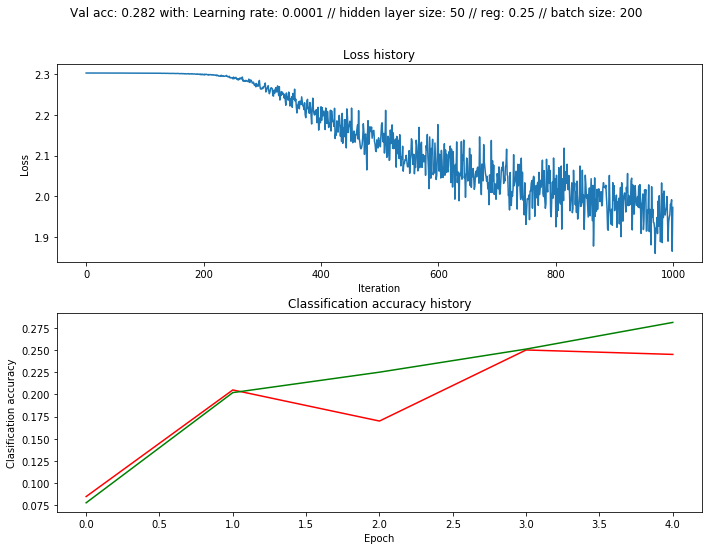

In [346]:
# Plot the loss function and train / validation accuracies
def plot_hist(stats, params, val_acc):
    fig = plt.figure()    
    st = fig.suptitle(f'Val acc: {val_acc} with: Learning rate: {params["learning_rate"]} // hidden layer size: {params["hidden_layer_size"]} // reg: {params["reg"]} // batch size: {params["batch_size"]}')
    ax1 = fig.add_subplot(211)
    ax1.plot(stats['loss_history'])
    ax1.set_title('Loss history')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')

    ax2 = fig.add_subplot(212)
    ax2.plot(stats['train_acc_history'], 'r', label='train')  # red
    ax2.plot(stats['val_acc_history'], 'g', label='val')  # green
    ax2.set_title('Classification accuracy history')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Clasification accuracy')    
    fig.tight_layout()
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)    

plot_hist(stats, {'learning_rate':1e-4, 'hidden_layer_size': hidden_size, 'reg': 0.25, 'num_iters': 1000,'batch_size': 200}, val_acc)


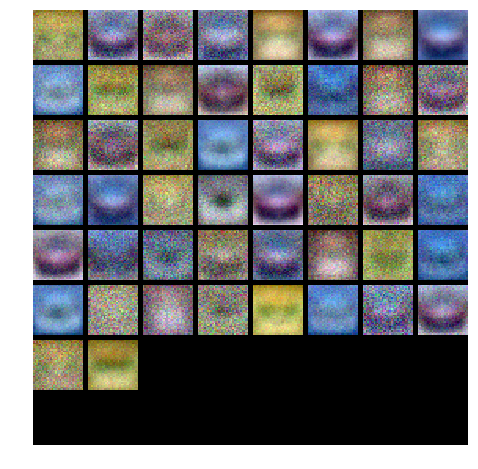

In [287]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [399]:
best_hyperparams = (None, None, None)
best_net = None # store the best model into this 
best_acc = float('-inf')
best_nets = []

{'learning_rate': 0.003853021317406686, 'hidden_layer_size': 138, 'reg': 13.951712240605161, 'num_iters': 4500, 'batch_size': 750}
iteration 0 / 4500: loss 2.303693
	W1 update scale is: 0.012722987034944786
	b1 update scale is: 1.0
	W2 update scale is: 0.23511599118799936
	b2 update scale is: 1.0
iteration 100 / 4500: loss 1.749308
	W1 update scale is: 0.10613502334750509
	b1 update scale is: 0.050645643879672846
	W2 update scale is: 0.09326312772895004
	b2 update scale is: 0.05631600367944276
iteration 200 / 4500: loss 1.754216
	W1 update scale is: 0.09065995068895999
	b1 update scale is: 0.034160552059707826
	W2 update scale is: 0.13232577462846104
	b2 update scale is: 0.04894231661285527
iteration 300 / 4500: loss 1.725469
	W1 update scale is: 0.10331885324066231
	b1 update scale is: 0.020505603325400582
	W2 update scale is: 0.16002940883144406
	b2 update scale is: 0.03616459795889672
iteration 400 / 4500: loss 1.582359
	W1 update scale is: 0.06945158849776184
	b1 update scale is: 0

/Users/liavkoren/AI Curriculum/ea-to-ml-ai/liav/Stanford ConvoNets/assignment1/cs231n/classifiers/neural_net.py:98: RuntimeWarning: divide by zero encountered in log
  y_hat = np.log(a3[range(num_train), y])  # (N, C)
/Users/liavkoren/AI Curriculum/ea-to-ml-ai/liav/Stanford ConvoNets/assignment1/cs231n/classifiers/neural_net.py:96: RuntimeWarning: invalid value encountered in true_divide
  a3 = exp/denom
/Users/liavkoren/AI Curriculum/ea-to-ml-ai/liav/Stanford ConvoNets/assignment1/cs231n/classifiers/neural_net.py:97: RuntimeWarning: invalid value encountered in true_divide
  a3 = (exp / denom)  # a3 = smax(z3)  ; (N, C)


NANs found, ABORTING. 
{'learning_rate': 0.027626648337751147, 'hidden_layer_size': 91, 'reg': 11.478296706245706, 'num_iters': 4500, 'batch_size': 750}
iteration 0 / 4500: loss 2.303297
	W1 update scale is: 0.07864066061619739
	b1 update scale is: 1.0
	W2 update scale is: 0.8076119328339195
	b2 update scale is: 1.0
NANs found, ABORTING. 
{'learning_rate': 0.01182782003853963, 'hidden_layer_size': 91, 'reg': 17.435022773298705, 'num_iters': 2000, 'batch_size': 500}
iteration 0 / 2000: loss 2.303272
	W1 update scale is: 0.04047813476323534
	b1 update scale is: 1.0
	W2 update scale is: 0.5887093884759862
	b2 update scale is: 1.0
NANs found, ABORTING. 
{'learning_rate': 0.001579284111320708, 'hidden_layer_size': 111, 'reg': 17.124661018027027, 'num_iters': 3000, 'batch_size': 750}
iteration 0 / 3000: loss 2.303416
	W1 update scale is: 0.0050237146305793816
	b1 update scale is: 1.0
	W2 update scale is: 0.09002896452861602
	b2 update scale is: 1.0
iteration 100 / 3000: loss 1.782773
	W1 upd

iteration 600 / 2500: loss 1.456868
	W1 update scale is: 0.031714243241839545
	b1 update scale is: 0.005690853384738742
	W2 update scale is: 0.018140112681154258
	b2 update scale is: 0.005782153724890336
iteration 700 / 2500: loss 1.503224
	W1 update scale is: 0.033214481058614166
	b1 update scale is: 0.005166826017898332
	W2 update scale is: 0.015329749250936804
	b2 update scale is: 0.004431531485619064
iteration 800 / 2500: loss 1.516043
	W1 update scale is: 0.025637991985698622
	b1 update scale is: 0.005007362100819432
	W2 update scale is: 0.01594169052148328
	b2 update scale is: 0.004585105200575064
iteration 900 / 2500: loss 1.393816
	W1 update scale is: 0.03325904089648222
	b1 update scale is: 0.003617097288992905
	W2 update scale is: 0.01411441013777058
	b2 update scale is: 0.003270280358598513
iteration 1000 / 2500: loss 1.465907
	W1 update scale is: 0.02970843492201914
	b1 update scale is: 0.00409079800165684
	W2 update scale is: 0.012290535181030323
	b2 update scale is: 0.003

iteration 1900 / 2000: loss 1.381727
	W1 update scale is: 0.010647929731826669
	b1 update scale is: 0.0015372107621813107
	W2 update scale is: 0.004327935071813589
	b2 update scale is: 0.0012537156788148354
	 Got 0.526
Got --> 0.526 <--
{'learning_rate': 0.0018069873008815882, 'hidden_layer_size': 139, 'reg': 7.089932091813987, 'num_iters': 3750, 'batch_size': 750}
iteration 0 / 3750: loss 2.303694
	W1 update scale is: 0.005581321840814009
	b1 update scale is: 1.0
	W2 update scale is: 0.08891130598980433
	b2 update scale is: 1.0
iteration 100 / 3750: loss 1.799283
	W1 update scale is: 0.03985124961446241
	b1 update scale is: 0.01204835267152618
	W2 update scale is: 0.029532189780439734
	b2 update scale is: 0.023060722411213794
iteration 200 / 3750: loss 1.587266
	W1 update scale is: 0.03936215508801164
	b1 update scale is: 0.013447559496988944
	W2 update scale is: 0.033837718654179554
	b2 update scale is: 0.023071345581816893
iteration 300 / 3750: loss 1.669939
	W1 update scale is: 0.0

iteration 0 / 3000: loss 2.303407
	W1 update scale is: 0.0033772577990939575
	b1 update scale is: 1.0
	W2 update scale is: 0.05605872879843202
	b2 update scale is: 1.0
iteration 100 / 3000: loss 1.909894
	W1 update scale is: 0.021921252699700623
	b1 update scale is: 0.019034873424596387
	W2 update scale is: 0.022255976028369727
	b2 update scale is: 0.01352080843054926
iteration 200 / 3000: loss 1.767310
	W1 update scale is: 0.026341182974105884
	b1 update scale is: 0.00942630036745469
	W2 update scale is: 0.015856897160355737
	b2 update scale is: 0.011840423401131346
iteration 300 / 3000: loss 1.726369
	W1 update scale is: 0.024869680929162783
	b1 update scale is: 0.0075339255813631715
	W2 update scale is: 0.01469352654052953
	b2 update scale is: 0.008584450085950272
iteration 400 / 3000: loss 1.620533
	W1 update scale is: 0.022537928618566804
	b1 update scale is: 0.006601692559868815
	W2 update scale is: 0.012705021559739708
	b2 update scale is: 0.006108991140640778
iteration 500 / 30

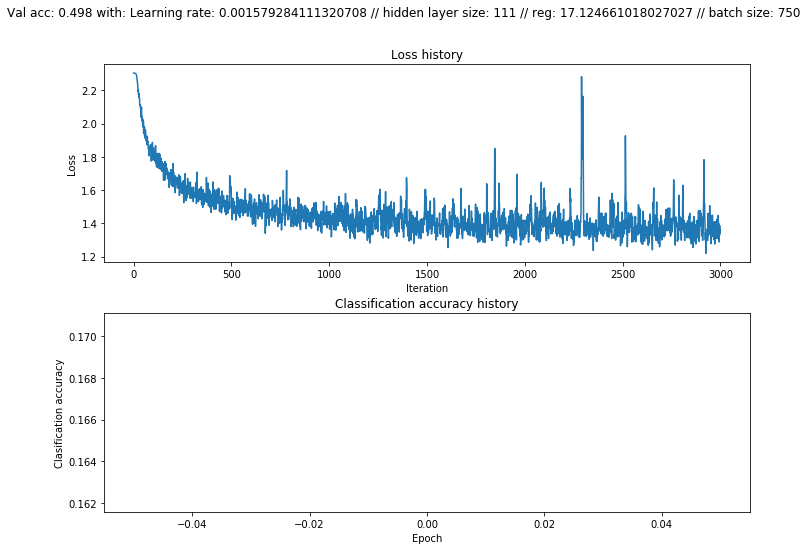

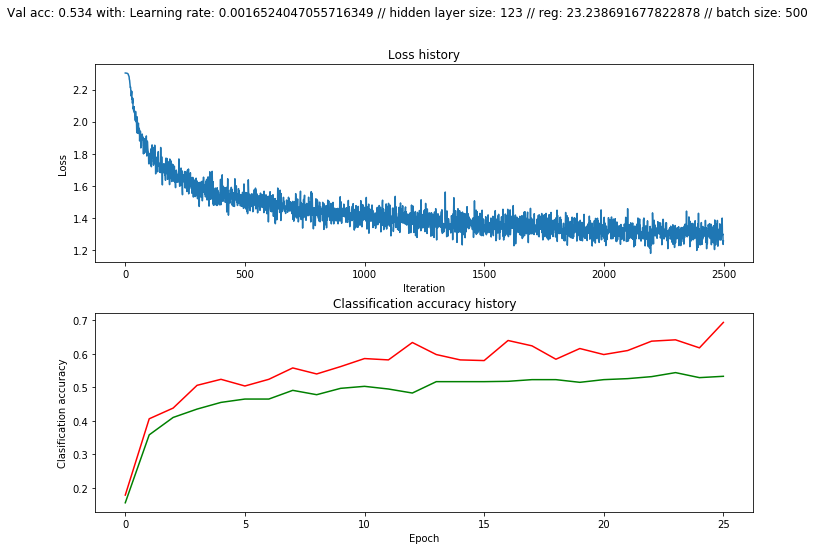

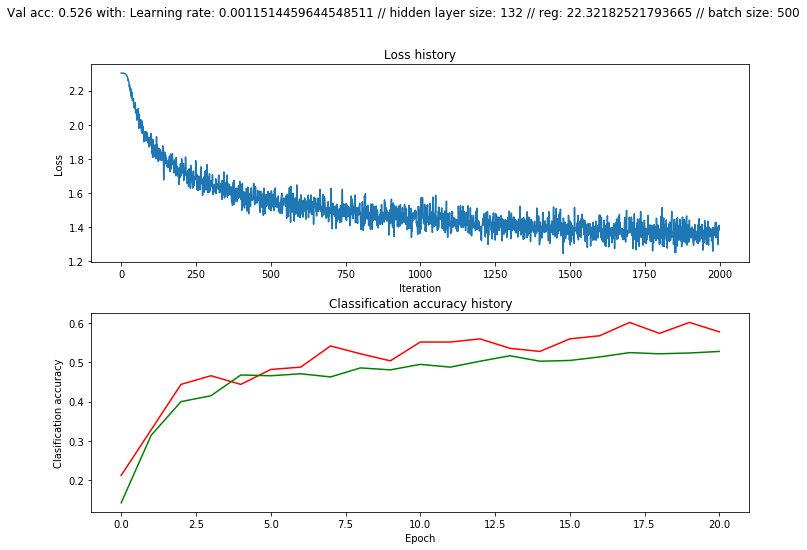

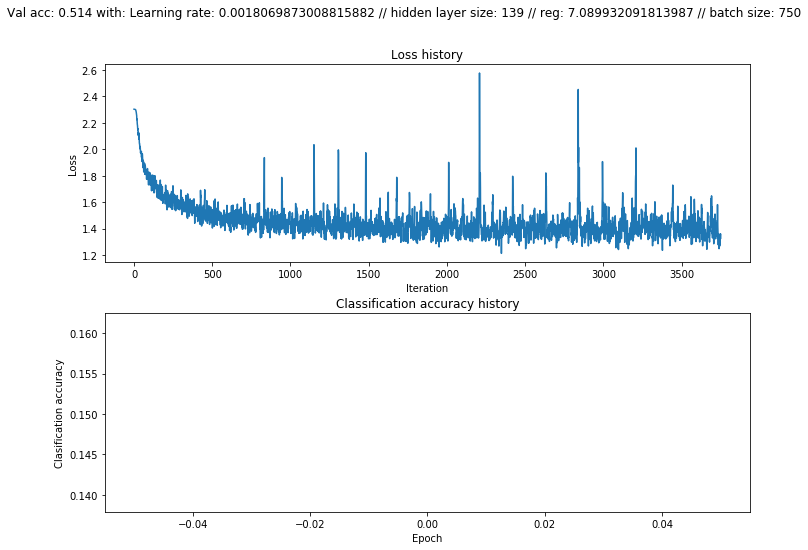

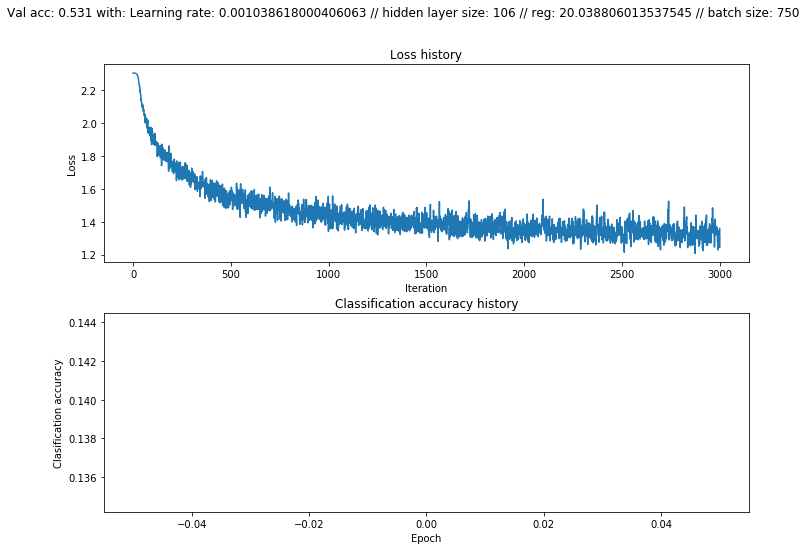

In [411]:
from itertools import product

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################



def get(hidden_layer_size):
    input_size = 32 * 32 * 3
    num_classes = 10
    return TwoLayerNet(input_size, hidden_layer_size, num_classes)

    
def train(net, num_iters, learning_rate, reg, batch_size, verbose=False, **kwargs):
    return net.train(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        num_iters=num_iters, 
        batch_size=batch_size,
        learning_rate=learning_rate, 
        learning_rate_decay=0.95,
        reg=0.25, 
        verbose=verbose
    )


def search(params):
    global best_acc
    global best_hyperparams
    global best_net
    global best_stats   
    net = get(params['hidden_layer_size'])
    print(f'{params}')
    stats = train(net, **params, verbose=True)
    if stats:
        val_acc = (net.predict(X_val) == y_val).mean()
        print(f'Got {val_acc}')
        plot_hist(stats, params, val_acc)
        if val_acc > 0.52:
            best_acc = val_acc
            best_net = net
            best_hyperparams = params
            best_stats = stats
            print(f'Got --> {best_acc} <--')
            best_nets.append(ResultWrapper(net, best_acc, params))


# Previous best results found with grid search using
# learning rate, reg, hidden size, num_iters, batch size:
# search([0.001], [0.6, 0.7], [90], [4000], [200, 256, 512])

def random_search(times=10):
    for index in range(times):
        print(f'{index}' + '= * 20')
        epochs = np.random.choice([4, 5, 6])
        batch_size = np.random.choice([500, 750])
        params = {
            'learning_rate':10**np.random.uniform(-3, -1.5), 
            'hidden_layer_size': np.random.randint(60, 150), 
            'reg': np.random.uniform(5, 25),
            'num_iters': batch_size * epochs,
            'batch_size': batch_size, 
        }
        search(params)
        print('='*20)        
random_search(times=10)
print('done')            


In [415]:
best_nets

[<Result: 0.534 @ {'learning_rate': 0.001688918488021109, 'hidden_layer_size': 123, 'reg': 19.740350457193525, 'num_iters': 2000, 'batch_size': 500}>,
 <Result: 0.534 @ {'learning_rate': 0.0016524047055716349, 'hidden_layer_size': 123, 'reg': 23.238691677822878, 'num_iters': 2500, 'batch_size': 500}>,
 <Result: 0.526 @ {'learning_rate': 0.0011514459644548511, 'hidden_layer_size': 132, 'reg': 22.32182521793665, 'num_iters': 2000, 'batch_size': 500}>,
 <Result: 0.531 @ {'learning_rate': 0.001038618000406063, 'hidden_layer_size': 106, 'reg': 20.038806013537545, 'num_iters': 3000, 'batch_size': 750}>]

In [405]:
class ResultWrapper:
    def __init__(self, net, acc, params):
        self.net = net
        self.acc = acc
        self.params = params
    
    def __repr__(self):
        return f'<Result: {self.acc} @ {self.params}>'

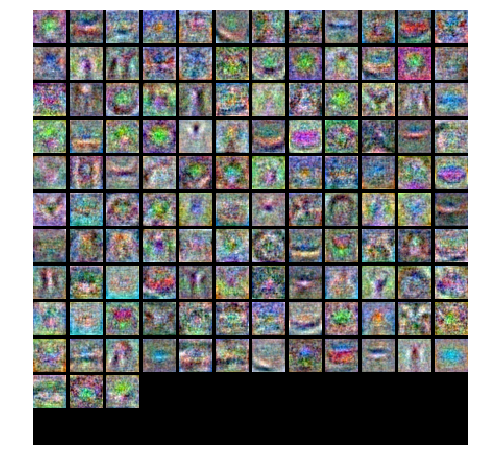

In [422]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [434]:
net0 = best_nets[0].net
net1 = best_nets[1].net
ensemble = np.zeros(1000)
for result_wrapper in best_nets:
    net = result_wrapper.net
    ensemble += net.predict(X_test)
ensemble /= len(best_nets)
ensemble = np.rint(ensemble) 

In [435]:
best_net = best_nets[1].net
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)
print('Ensemble accuracy: ', (ensemble == y_test).mean())

Test accuracy:  0.548
Ensemble accuracy:  0.462
